# Project Description
// write something here

### Steps
1. Use segmentation model to segment rices in the image.
2. Find the ratio between widht and height of each rice.
3. Rate each rice based on its ratio from step 2.
4. Use classification model to classify the quality of rice germ.
5. Calculate score of group of rices based on the rating from step 3 and quality from step 4.

# Create new Conda environment (optional)
You can run with the following command in your conda terminal:
```bash
!conda env create -f environments.yaml
```
Or run the following cell to create a new conda environment.

In [1]:
# uncomment the following line to install the environment
# !conda env create -f environments.yaml
# !conda activate cv_term_project

In [2]:
# or install the required packages manually
# !pip install requirements.txt

# Import Libraries


In [3]:
import os
import sys
import shutil
import cv2
import numpy as np
import gdown
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pathlib import Path
import random

In [4]:
# set random seed
random.seed(42)

# Load test images

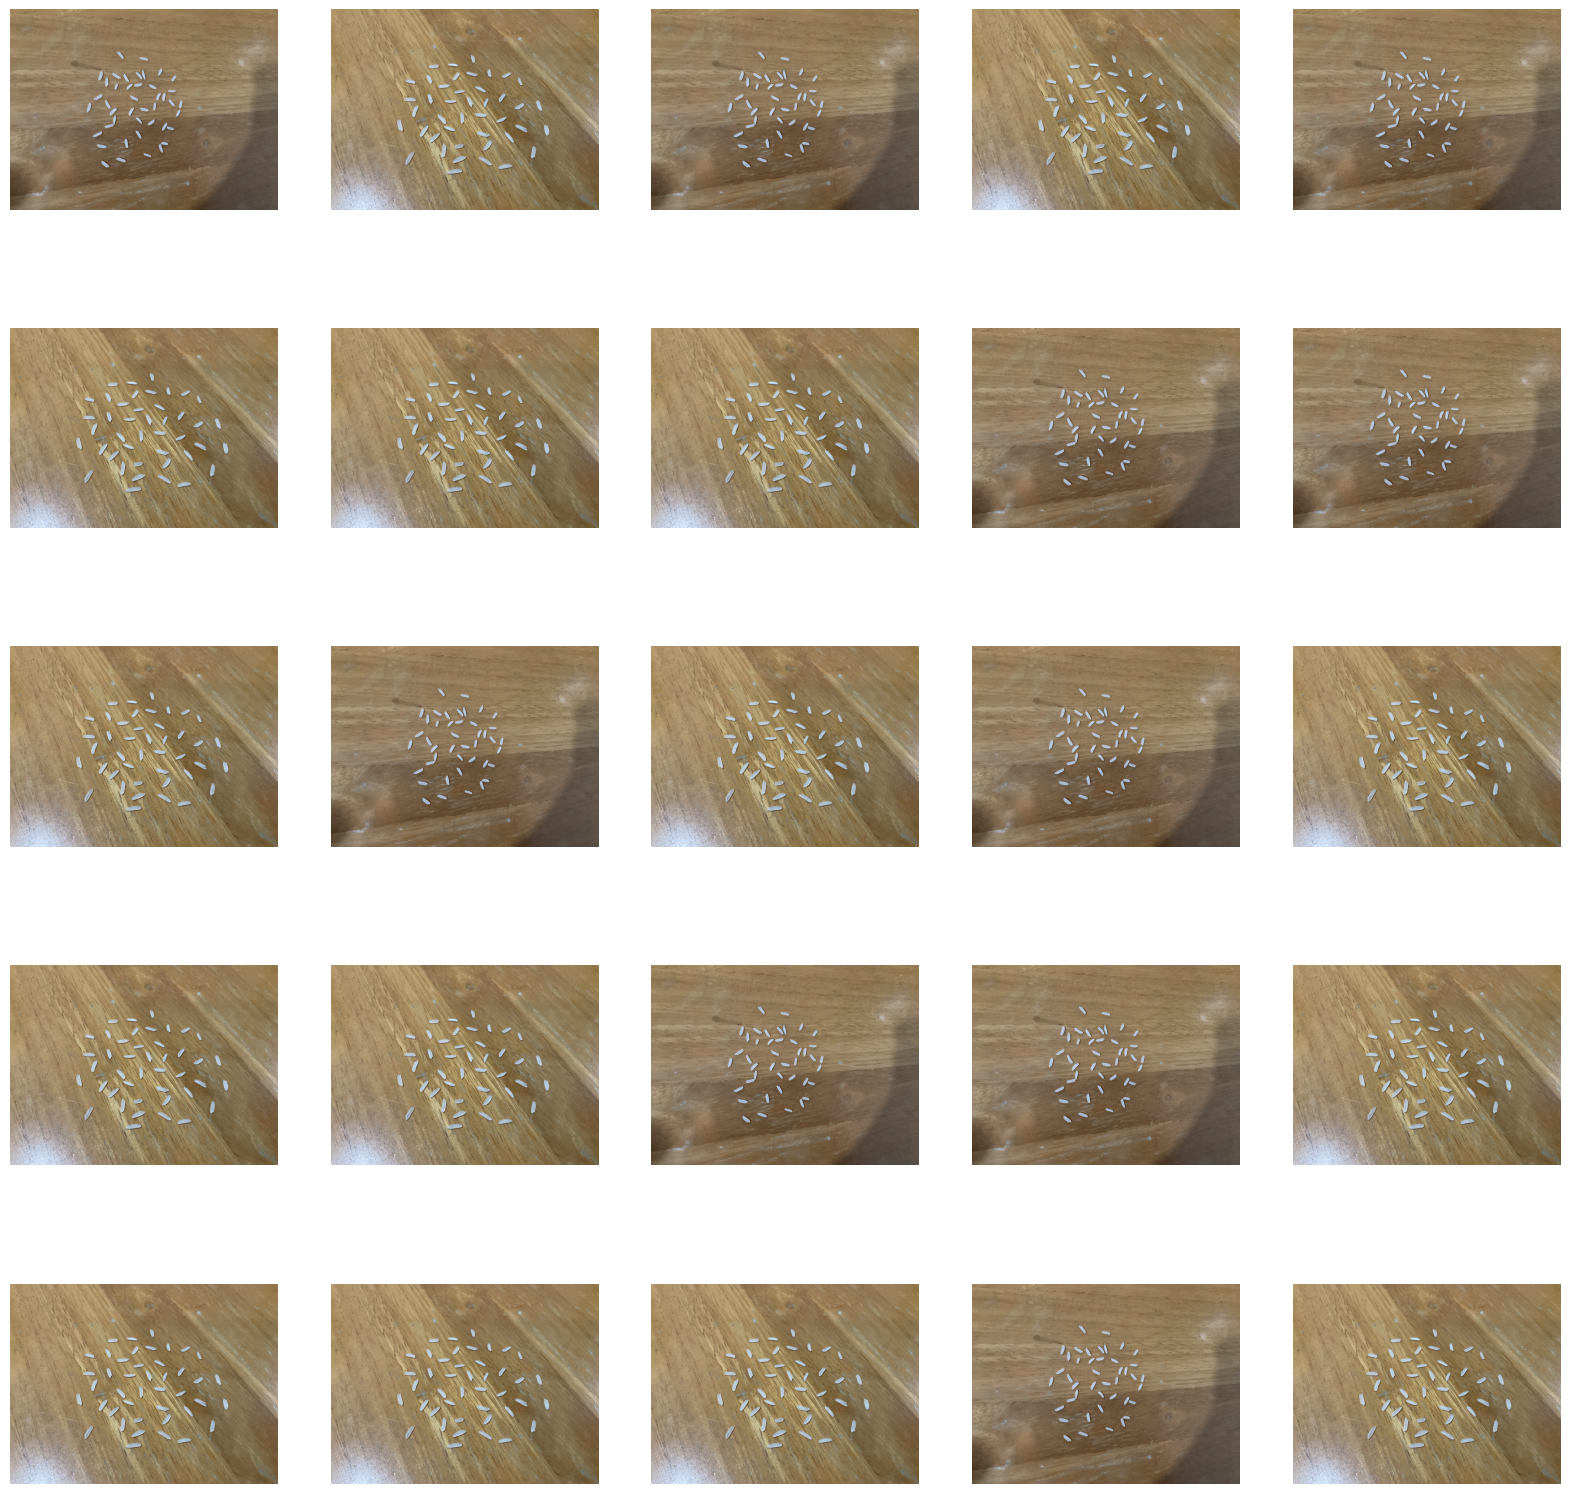

In [5]:
test_image_path = './test'
test_images = os.listdir(test_image_path)
test_images = [os.path.join(test_image_path, img) for img in test_images]

# show 25 random images from the test set
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = cv2.imread(test_images[np.random.randint(len(test_images))])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Load models

In [6]:
Path("models").mkdir(parents=True, exist_ok=True)

In [7]:
# RIP my 1GB google drive
!gdown 1XAhWz2LepRqSSsCKD2tMY0nlSI8me6TY -O ./models/seg-model.onnx
!gdown 1jEC3CKjIo5vtm3qGAW2lVlP1fZsE7Lpp -O ./models/rice-germ-cls-model.onnx

Downloading...
From (original): https://drive.google.com/uc?id=1XAhWz2LepRqSSsCKD2tMY0nlSI8me6TY
From (redirected): https://drive.google.com/uc?id=1XAhWz2LepRqSSsCKD2tMY0nlSI8me6TY&confirm=t&uuid=f48f04e9-7862-4b51-b2d8-26f1364f040c
To: c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\models\seg-model.onnx

  0%|          | 0.00/287M [00:00<?, ?B/s]
  0%|          | 524k/287M [00:00<01:09, 4.13MB/s]
  1%|          | 1.57M/287M [00:00<00:38, 7.34MB/s]
  1%|          | 3.15M/287M [00:00<00:30, 9.43MB/s]
  2%|▏         | 4.72M/287M [00:00<00:27, 10.4MB/s]
  2%|▏         | 6.29M/287M [00:00<00:25, 11.1MB/s]
  3%|▎         | 7.86M/287M [00:00<00:24, 11.6MB/s]
  3%|▎         | 9.44M/287M [00:00<00:23, 11.9MB/s]
  4%|▍         | 11.0M/287M [00:01<00:22, 12.1MB/s]
  4%|▍         | 12.6M/287M [00:01<00:22, 12.3MB/s]
  5%|▍         | 14.2M/287M [00:01<00:22, 12.4MB/s]
  5%|▌         | 15.7M/287M [00:01<00:21, 12.5MB/s]
  6%|▌         | 17.3M/287M [00:01<00:21, 12.6MB/s]
  7%|▋       

# Rice Segmentation

In [8]:
seg_model = YOLO('./models/seg-model.onnx', task='segment')

In [9]:
# do not change imgsz, but you can try different values for conf
seg_results = seg_model.predict(source=test_image_path, imgsz=800, device="0", conf=0.5)

Loading models\seg-model.onnx for ONNX Runtime inference...

image 1/2 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\test\test1.png: 800x800 42 {0: 'Jasmine'}s, 3 {1: 'Non-Jasmine'}s, 143.0ms
image 2/2 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\test\test2.png: 800x800 43 {0: 'Jasmine'}s, 1 {1: 'Non-Jasmine'}, 140.0ms
Speed: 18.0ms preprocess, 141.5ms inference, 56.5ms postprocess per image at shape (1, 3, 800, 800)


In [10]:
display(seg_results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.], device='cuda:0')
conf: tensor([0.9539, 0.9519, 0.9506, 0.9506, 0.9504, 0.9495, 0.9493, 0.9474, 0.9472, 0.9467, 0.9457, 0.9445, 0.9442, 0.9440, 0.9438, 0.9435, 0.9412, 0.9412, 0.9411, 0.9404, 0.9401, 0.9393, 0.9376, 0.9370, 0.9364, 0.9355, 0.9354, 0.9352, 0.9336, 0.9334, 0.9315, 0.9303, 0.9287, 0.9286, 0.9284, 0.9270, 0.9267, 0.9258, 0.9252,
        0.9219, 0.9162, 0.8975, 0.7919, 0.7857, 0.6559], device='cuda:0')
data: tensor([[1.4812e+03, 1.8652e+03, 1.6366e+03, 2.0084e+03, 9.5389e-01, 0.0000e+00],
        [1.3319e+03, 1.7535e+03, 1.4645e+03, 1.9217e+03, 9.5186e-01, 0.0000e+00],
        [2.5224e+03, 1.2706e+03, 2.6253e+03, 1.3998e+03, 9.5059e-01, 0.0000e+00],
        [2.2876e+03, 1.9716e+03, 2.4167e+03, 2.1287e+03, 9.5058e-01, 0.0000e+00

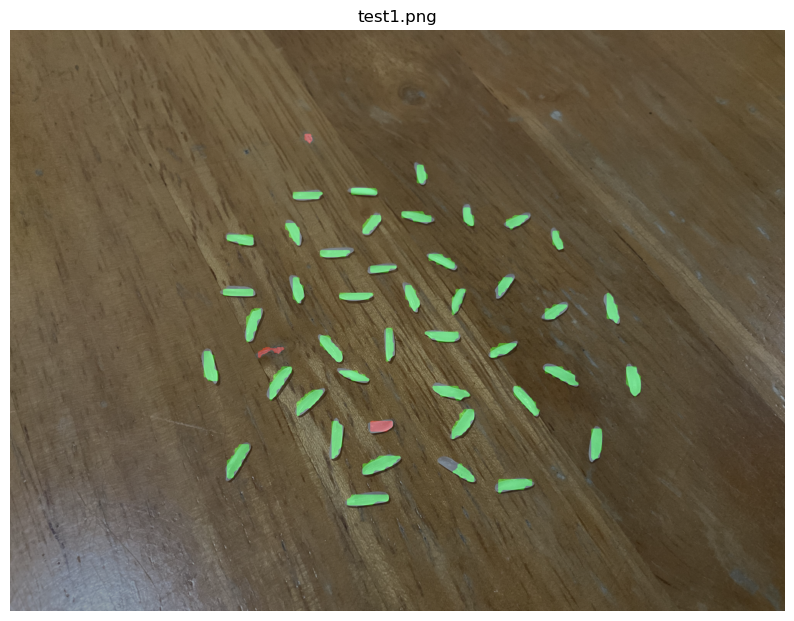

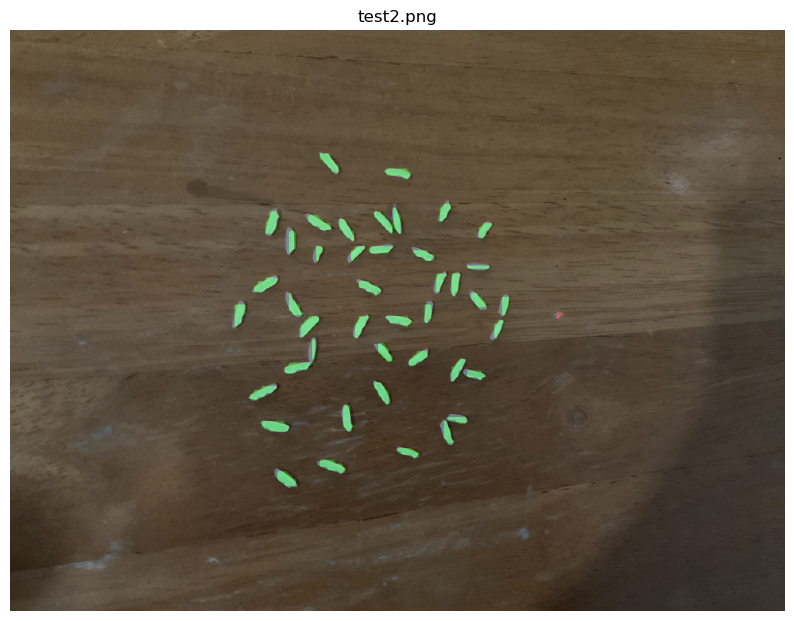

In [11]:
# visualize the first result image
colors = {
    0: (0, 255, 0), # Jasmine rice
    1: (255, 0, 0), # Non-jasmine rice
}

def display_seg_result(result):
    base_image = result.orig_img
    base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

    labels = result.boxes.cls.cpu().numpy()
    xy = result.masks.xy
    
    # draw masks of the detected objects (iterate over xy)
    blank_image = np.zeros_like(base_image)
    for mask, label in zip(xy, labels):
        mask = mask.reshape((-1, 1, 2))
        mask = mask.astype(np.int32)
        cv2.fillPoly(blank_image, [mask], colors[int(label)])
    
    alpha = 0.35
    cv2.addWeighted(blank_image, alpha, base_image, 1 - alpha, 0, base_image)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(base_image)
    plt.axis('off')
    plt.title(os.path.basename(result.path))
    plt.show()
    
display_seg_result(seg_results[0])
display_seg_result(seg_results[1])

In [12]:
# since the segmentation model is not perfect, we will use watershed algorithm to help improve the results
def improve_result(result, imshow=False):
    base_image = result.orig_img
    # base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

    labels = result.boxes.cls.cpu().numpy()
    xy = result.masks.xy
    items = [item for item in zip(xy, labels) if item[1] == 0] # filter out non-jasmine rice
    
    # create blank image with the same shape as the base image but with only one channel
    blank_image = np.zeros((base_image.shape[0], base_image.shape[1]), dtype=np.uint8)
    for mask, label in items:
        mask = mask.astype(np.int32)
        cv2.fillPoly(blank_image, [mask], 255)
    
    # apply distance transform to the blank_image
    distanceTransformOutput = cv2.distanceTransform(blank_image,cv2.DIST_L2, 3)
    maxDistance = np.max(distanceTransformOutput)
    roughMarkerPixel = np.uint8(distanceTransformOutput > 0.35 * maxDistance)
    backgroundMask = np.invert(roughMarkerPixel)
    
    # generate seeds
    _, seed = cv2.connectedComponents(roughMarkerPixel)
    
    # finding unknown region
    dilate_blanks = cv2.dilate(blank_image, np.ones((5,5),np.uint8), iterations = 6)

    thresholdCoinImageCopy = np.uint8(dilate_blanks/255)
    unknownRegion = np.uint8(thresholdCoinImageCopy - roughMarkerPixel)
    newSeed = seed.copy()
    newSeed += 1
    newSeed[unknownRegion==1] = 0
    
    # apply watershed algorithm
    outputImage = base_image.copy()
    borderImage = base_image.copy()
    outputMarkers = cv2.watershed(outputImage,newSeed) ### Warning seed will get modified here!!

    if imshow:
        # 1 is background, -1 is border
        for outputMarkerIdx in range(2,np.max(outputMarkers+1)):
            color = (0, 255, 0)
            # draw with opacity = 50%
            outputImage[np.where(outputMarkers == outputMarkerIdx)] = (outputImage[np.where(outputMarkers == outputMarkerIdx)] * 0.5 + np.array(color) * 0.5).astype(np.uint8)
        
        outputImage = cv2.cvtColor(outputImage,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))
        plt.title('Segmentation Result')
        plt.imshow(outputImage)
        plt.show()
    
    return outputMarkers

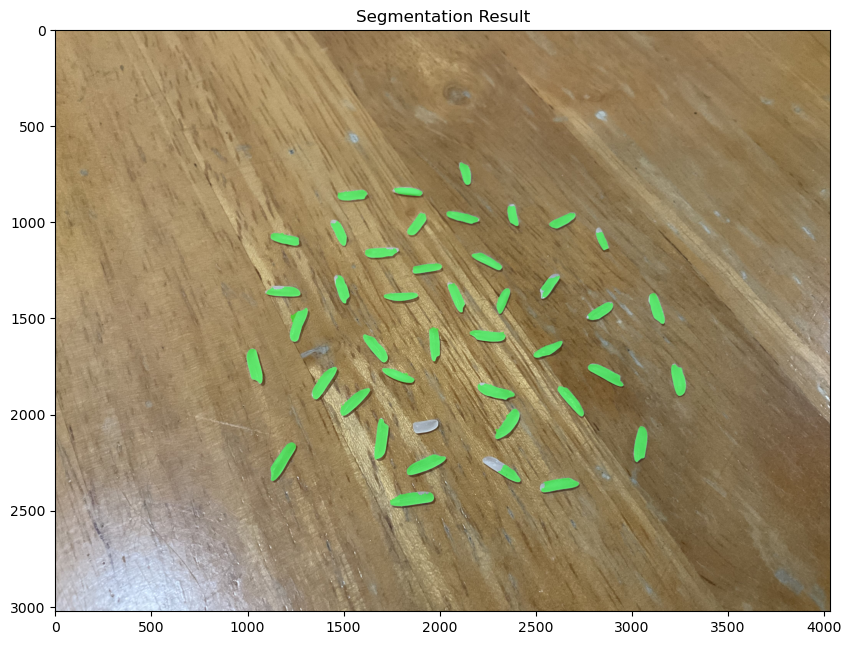

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [13]:
# test the function
improve_result(seg_results[0], imshow=True)

# Rice rating calculation

In [14]:
rice_germ_model = YOLO('./models/rice-germ-cls-model.onnx', task='classify')

### the cell below may look a bit complex, think of it as a M A G I C

In [15]:
from scipy.spatial import ConvexHull

# main function to process the rating, the input is the result from the segmentation model
def process_result(result):
    outputMarkers = improve_result(result)
    
    germ_results = []
    ratios = []
    probs = []
    
    for i in range(2,np.max(outputMarkers)+1):
        mask = np.zeros_like(outputMarkers, dtype=np.uint8)
        mask[outputMarkers == i] = 255
        riceImg = result.orig_img
        
        # crop the riceImg with square bounding box
        contour, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x,y,w,h = cv2.boundingRect(contour[0])
        riceImg = riceImg[y:y+h, x:x+w]
        mask = mask[y:y+h, x:x+w]
        
        # openning operation to remove small noise
        kernel = np.ones((7,7),np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        # apply mask to the original image
        riceImg = cv2.bitwise_and(riceImg, riceImg, mask=mask)
        
        # create a black image 128x128 and paste the resized riceImg in the center (by keeping the aspect ratio of the riceImg)
        blank_image = np.zeros((128, 128, 3), np.uint8)
        h, w = riceImg.shape[:2]
        r = 96 / max(h, w)
        h, w = int(h * r), int(w * r)
        riceImg = cv2.resize(riceImg, (w, h))
        x_offset = (128 - w) // 2
        y_offset = (128 - h) // 2
        blank_image[y_offset:y_offset+h, x_offset:x_offset+w] = riceImg
        
        germ_result = rice_germ_model.predict(blank_image, imgsz=128, conf=0.5, device="0")
        prob = germ_result[0].probs.data.cpu().numpy() # class probs = [Bad, Good, Moderate]
        
        # calculate the ratio of the width and length of the rice grain
        real_width, real_length = compute_width_length(contour)
        ratio = real_length / real_width
        
        ratios.append(ratio)
        probs.append(np.argmax(prob))
        germ_results.append(germ_result)
    
    # calculate the rating
    rating = calculate_rating(ratios, probs)
        
    return rating, germ_results, ratios

# for calculating the width and length of the rice grain (use convex hull and rotatation)
def compute_width_length(contour):
    points = contour[0].reshape(-1, 2)
    
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]

    angles = np.arange(0, 360, 1)
    widths = []
    lengths = []

    for angle in angles:
        angle_rad = np.deg2rad(angle)
        rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad), np.cos(angle_rad)]])
        rotated_points = np.dot(hull_points, rotation_matrix)
        min_x, max_x = np.min(rotated_points[:, 0]), np.max(rotated_points[:, 0])
        min_y, max_y = np.min(rotated_points[:, 1]), np.max(rotated_points[:, 1])
        width = max_x - min_x
        length = max_y - min_y
        widths.append(width)
        lengths.append(length)

    length_idx = np.argmax(lengths)
    real_length = lengths[length_idx]
    real_width = widths[length_idx]

    return real_width, length_idx

# for calculating the rating
def calculate_rating(ratios, probs):
    # prob {0: Bad, 1: Good, 2: Moderate}
    probs_score = probs.count(1) * 2 + probs.count(2) * 1 + probs.count(0) * 0
    
    # from experiment, Good rice has ratio more than 3.2443
    lw_quality = []
    for ratio in ratios:
        if ratio > 3.2443:
            lw_quality.append(3)
        elif ratio > 3.2443*0.9:
            lw_quality.append(2)
        elif ratio > 3.2443*0.8:
            lw_quality.append(1)
        else:
            lw_quality.append(0)
    
    lw_score = lw_quality.count(3) * 3 + lw_quality.count(2) * 2 + lw_quality.count(1) * 1 + lw_quality.count(0) * 0
    
    return (probs_score + lw_score) / len(ratios)
    
# for plotting the result from the germ classification model
def plot_germ_result(germ_results, ratios, rating=None):
    num_rice = len(germ_results)
    num_of_col = 5
    num_of_row = int(np.ceil(num_rice / num_of_col))
    fig, axs = plt.subplots(num_of_row, num_of_col, figsize=(20, 40))
    
    for i in range(num_rice):
        germ_result = germ_results[i]
        probs = germ_result[0].probs.data.cpu().numpy() # probs {0: Bad, 1: Good, 2: Moderate}
        
        # display the result with probability text on the image
        ax = axs[i // num_of_col, i % num_of_col]
        ax.imshow(cv2.cvtColor(germ_result[0].orig_img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.text(5, 20, f"Germ Good: {probs[1]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
        ax.text(5, 30, f"Germ Moderate: {probs[2]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
        ax.text(5, 10, f"Germ Bad: {probs[0]:.2f}", color='white', fontsize=10, backgroundcolor='blue')
        ax.text(5, 40, f"LW Ratio: {ratios[i]:.4f}", color='white', fontsize=10, backgroundcolor='blue')
    
    plt.show()

Loading models\rice-germ-cls-model.onnx for ONNX Runtime inference...

0: 128x128 Bad 0.99, Moderate 0.01, Good 0.00, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.94, Bad 0.06, Good 0.00, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.75, Bad 0.23, Good 0.03, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Good 0.78, Moderate 0.21, Bad 0.01, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.76, Bad 0.14, Good 0.10, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Good 0.71, Moderate 0.28, Bad 0.01, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.51, Bad

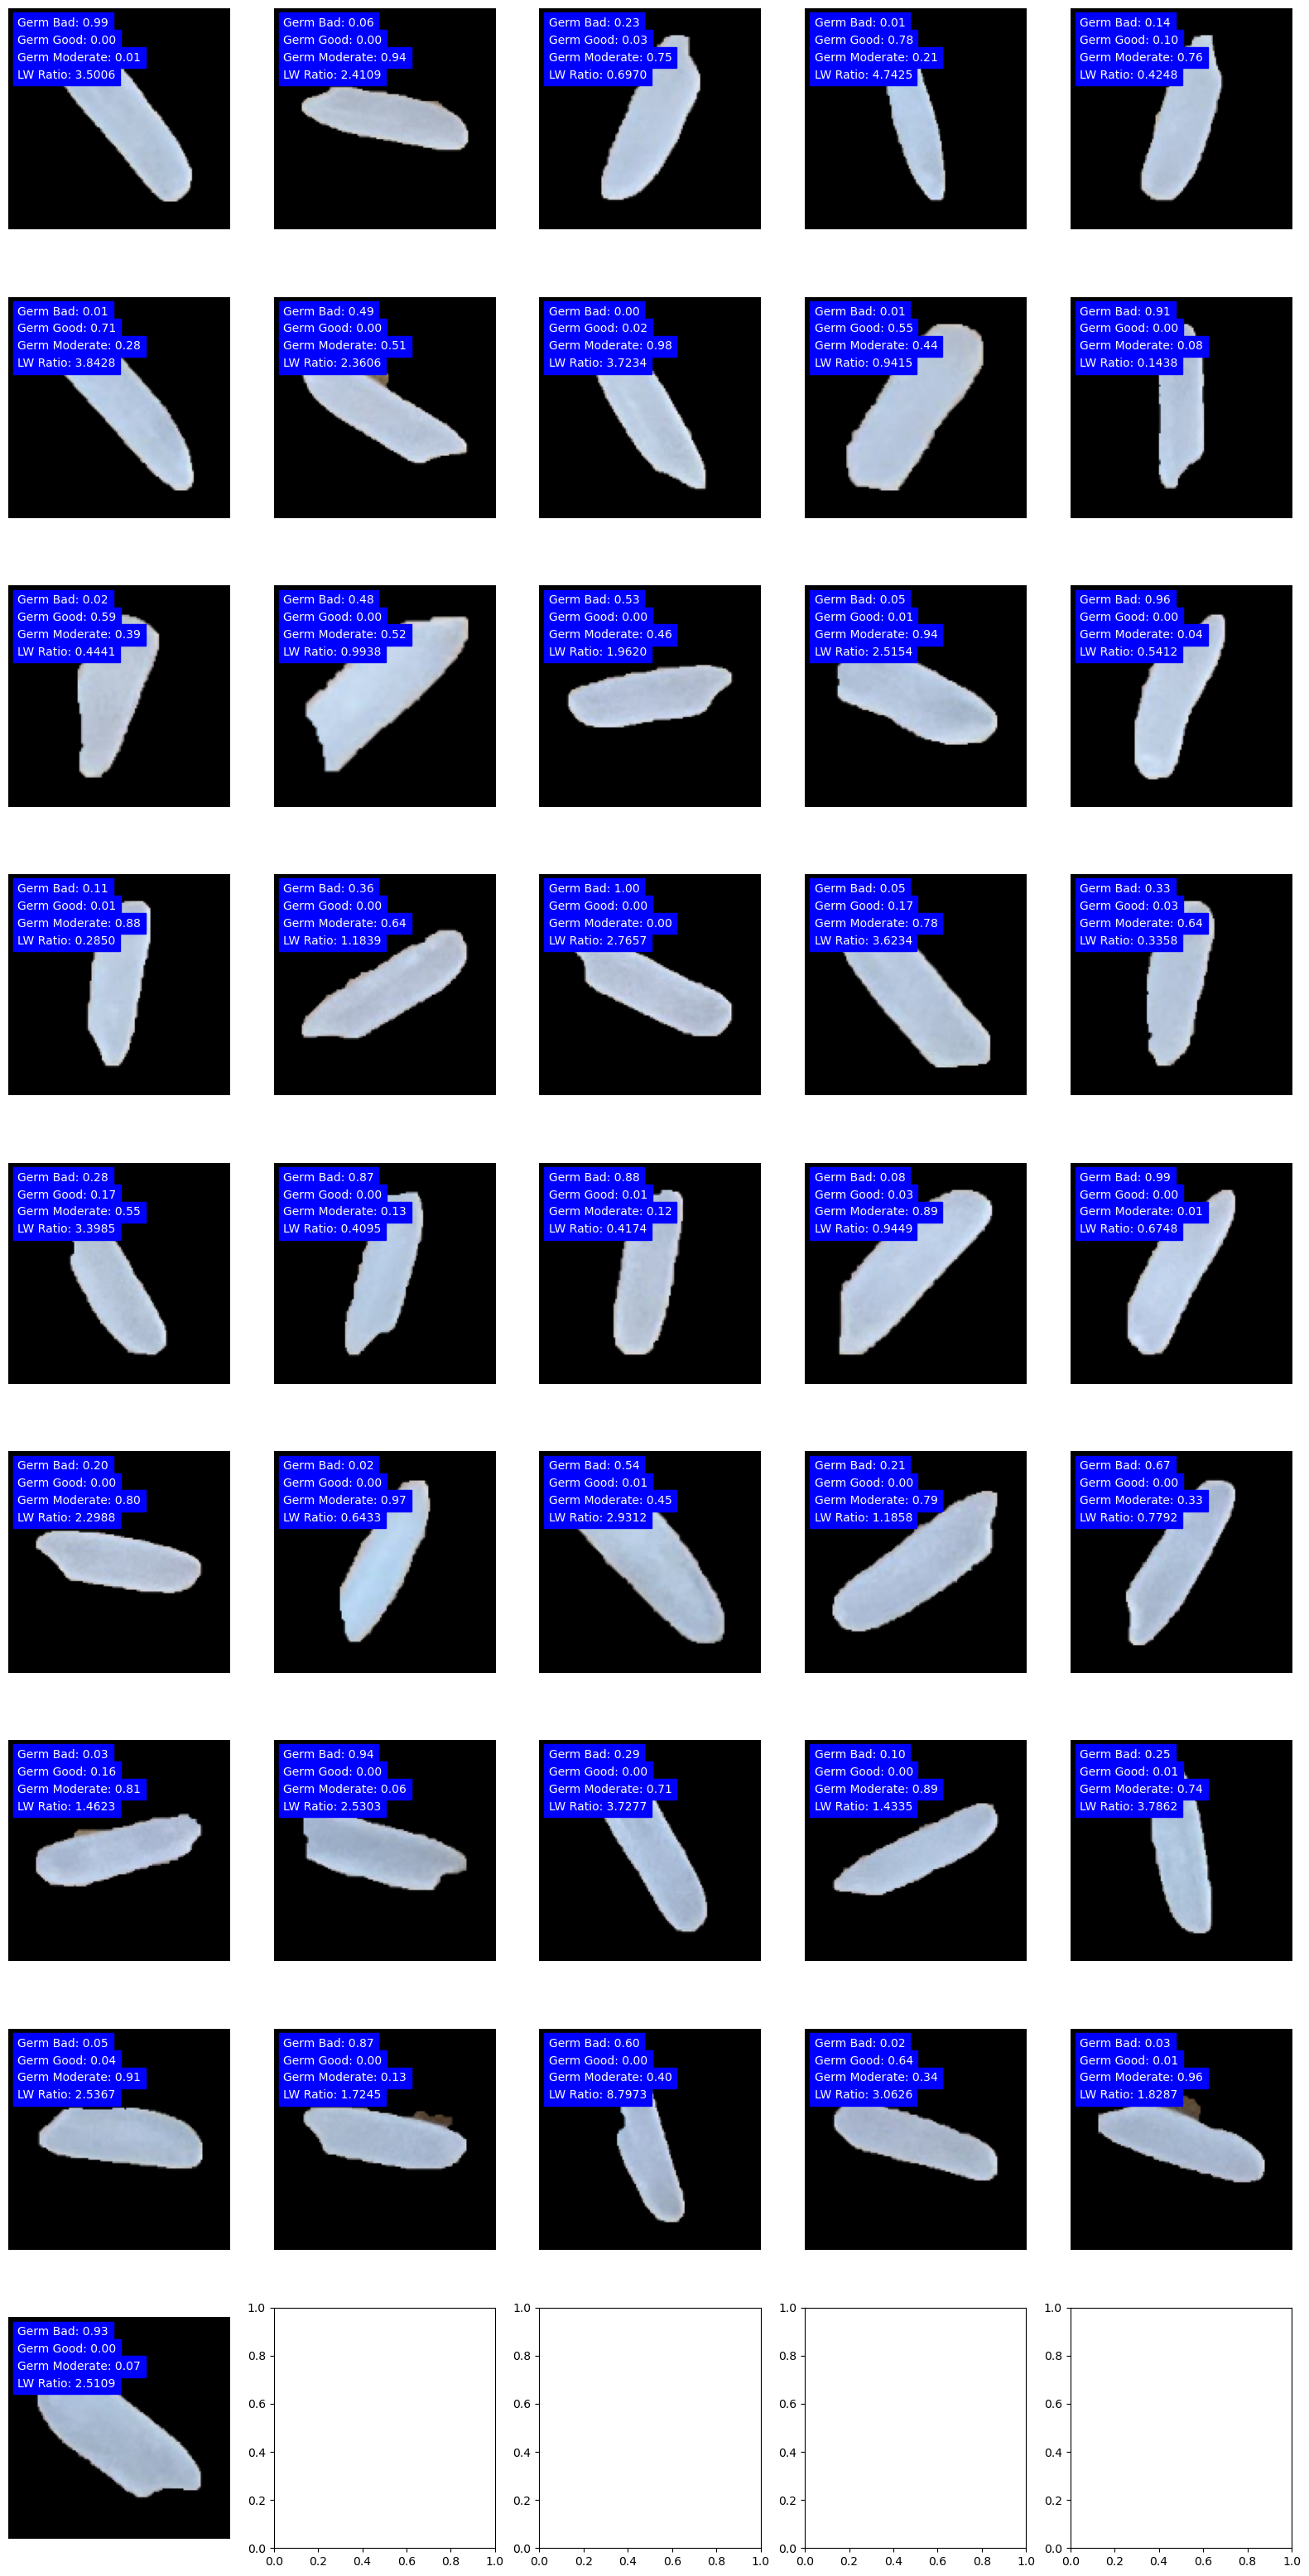

Overall Rating: 1.5609756097560976


In [16]:
# test the function
rating, germ_results, ratios = process_result(seg_results[1])
plot_germ_result(germ_results, ratios)
print(f"Overall Rating: {rating}")

# Calculate rating of all images
please put rice images that you want to rate in the './test' folder and run the cell below

In [20]:
result_rating = []
for result in seg_results:
    rating, germ_results, ratios = process_result(result)
    file_name = os.path.basename(result.path)
    result_rating.append((file_name, rating))


0: 128x128 Moderate 0.68, Bad 0.24, Good 0.08, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.67, Good 0.32, Bad 0.01, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.95, Bad 0.02, Good 0.02, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.97, Bad 0.02, Good 0.00, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.80, Bad 0.18, Good 0.02, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.72, Good 0.16, Bad 0.12, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 Moderate 0.97, Good 0.02, Bad 0.00, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference

In [21]:
for file_name, rating in result_rating:
    print(f"Overall rating of {file_name}: {rating}")

Overall rating of test1.png: 1.9523809523809523
Overall rating of test2.png: 1.5609756097560976
